bias =  0.012757978956902564
rmse =  0.3371046605791779


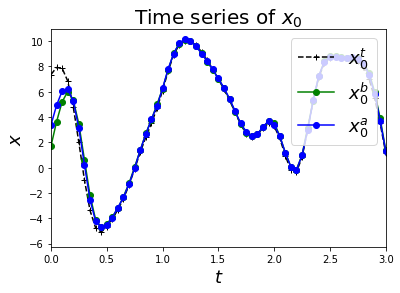

bias =  -0.21709107678528816
rmse =  0.3006406092549228


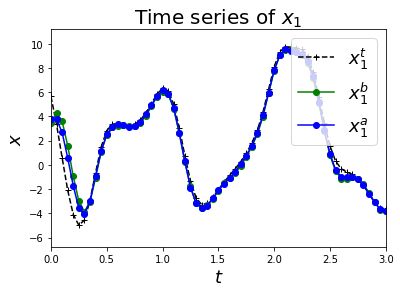

bias =  -0.20832880878056576
rmse =  0.40324593525028485


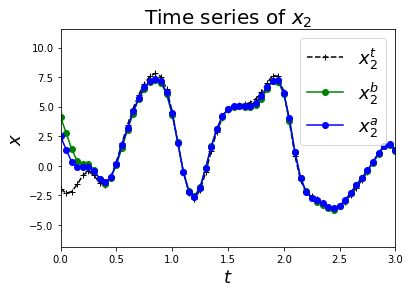

bias =  0.022608464135393715
rmse =  0.3097525601941485


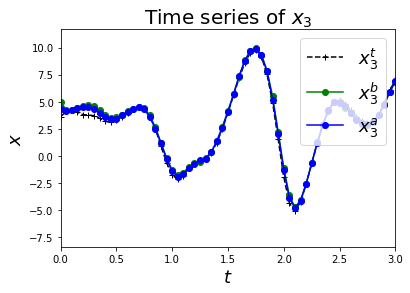

bias =  -0.0015080635648673625
rmse =  0.26033120776864616


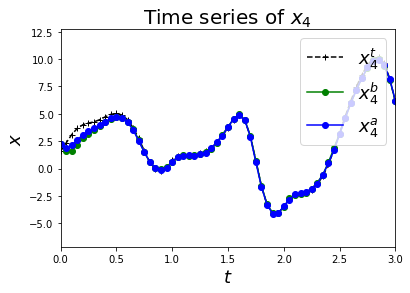

bias =  -0.06912036896452743
rmse =  0.23480976156363564


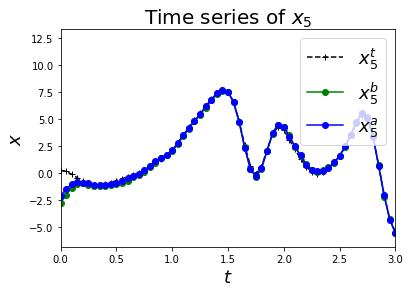

bias =  -0.06925239429388161
rmse =  0.20182940212387507


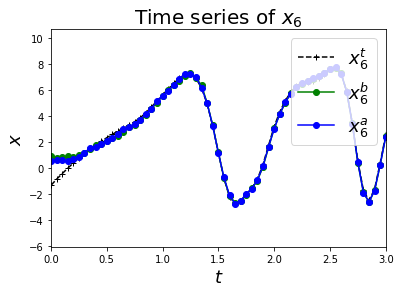

bias =  0.004806116258198606
rmse =  0.17592643168398464


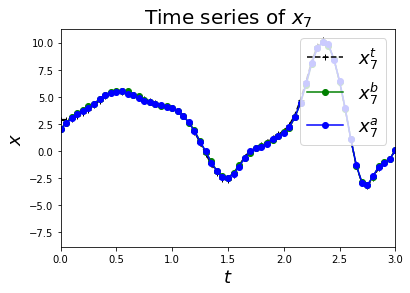

bias =  0.10724067106546878
rmse =  0.2521889392435235


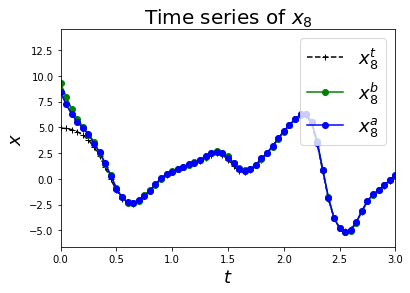

bias =  -0.05950674313431753
rmse =  0.15798616150439812


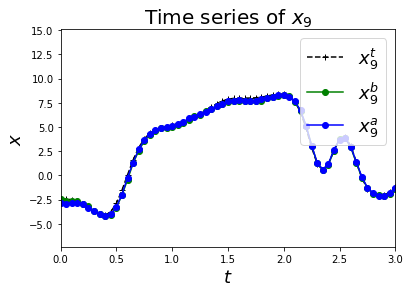

bias =  0.03400007396251885
rmse =  0.23461822446984482


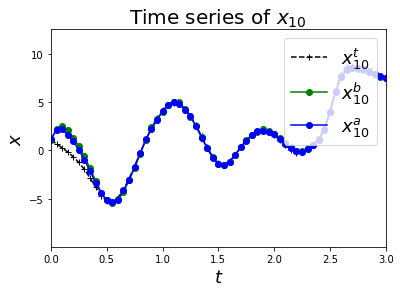

bias =  0.21141965396050222
rmse =  0.5649810357034608


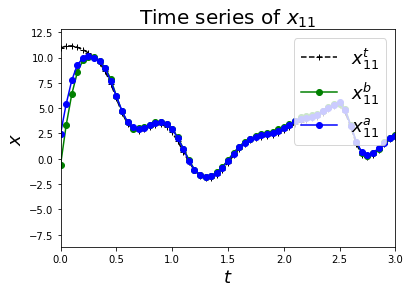

bias =  0.021684336555273555
rmse =  0.28550621011995236


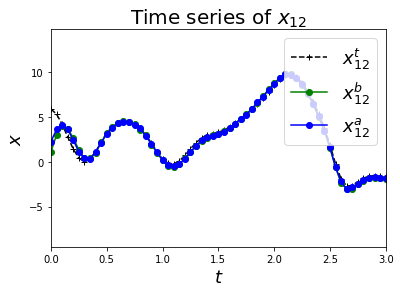

bias =  0.13175557658503448
rmse =  0.42308510279681727


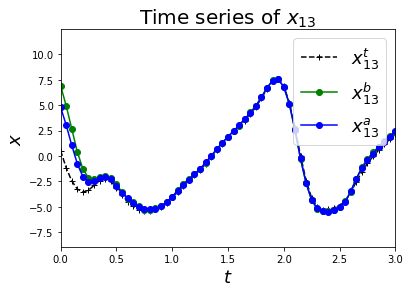

bias =  0.13982678576580462
rmse =  0.26161704374486505


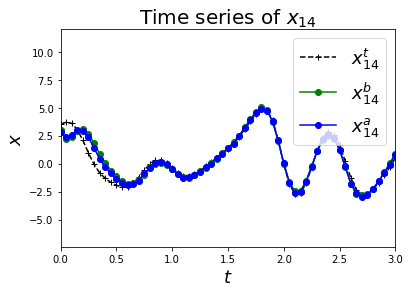

bias =  0.24826552438817523
rmse =  0.6414034380299963


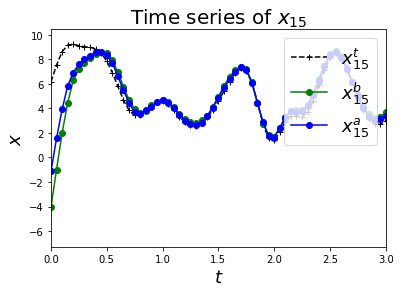

bias =  -0.10461761780357728
rmse =  0.54870391531928


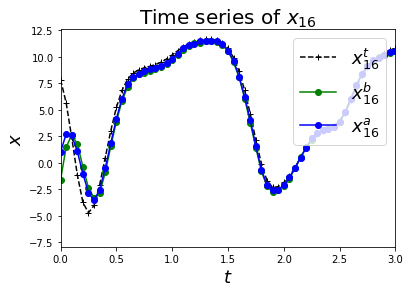

bias =  -0.21739542903085637
rmse =  0.4360522910525966


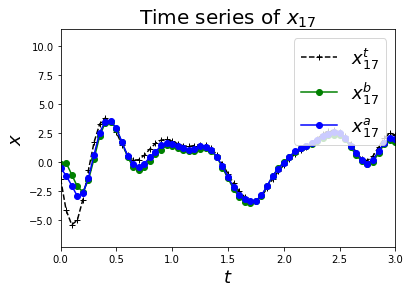

bias =  -0.1922561536090745
rmse =  0.34500967563802815


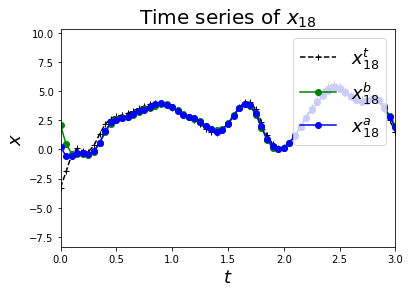

bias =  0.02263700398749275
rmse =  0.4744673469202266


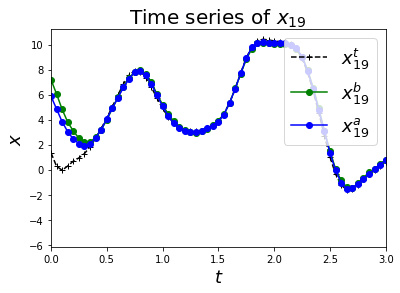

bias =  0.009234404315889762
rmse =  0.30076386176551523


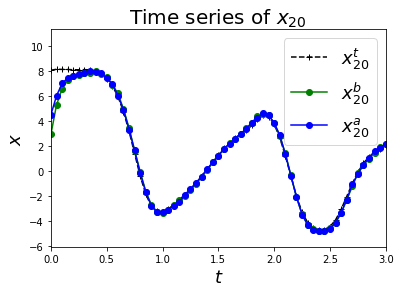

bias =  -0.20161507048294047
rmse =  0.25842870187184197


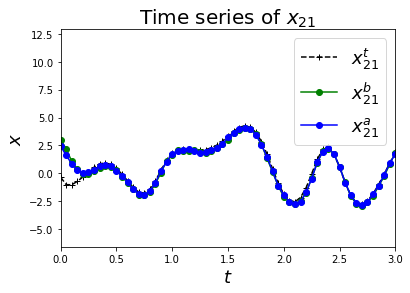

bias =  -0.051240542887309906
rmse =  0.4436415864000565


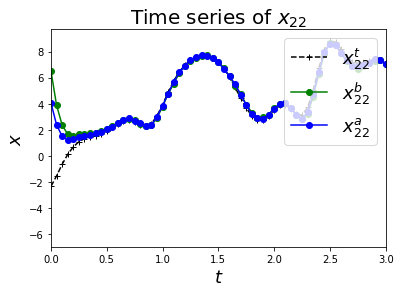

bias =  0.00504076396343538
rmse =  0.2771226386134897


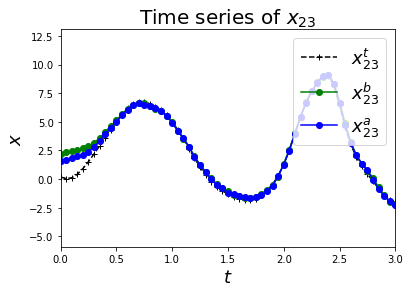

bias =  0.08470525196378301
rmse =  0.18684651591439058


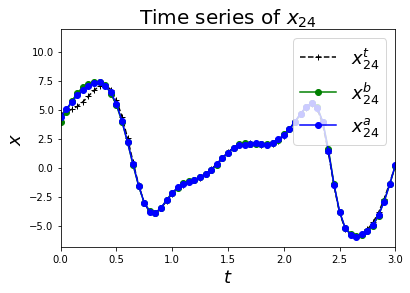

bias =  -0.025451236187473823
rmse =  0.2812227597169902


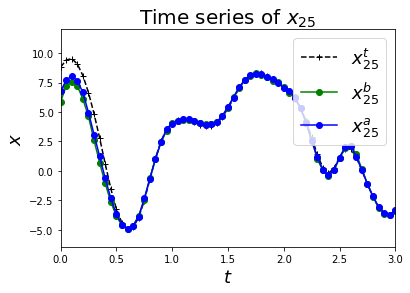

bias =  -0.08355422155153232
rmse =  0.14775941513515148


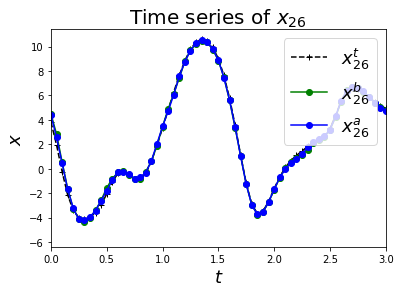

bias =  -0.012954447609745585
rmse =  0.17880891713332647


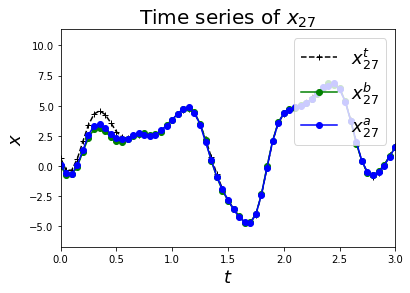

bias =  -0.037620102643043205
rmse =  0.13784852552930607


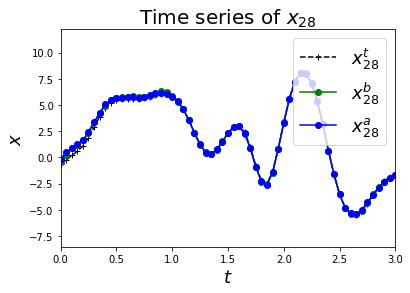

bias =  -0.02682179896364666
rmse =  0.3199955294522305


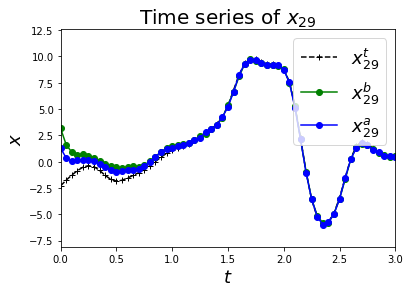

bias =  0.1479862901920883
rmse =  0.6177892334620626


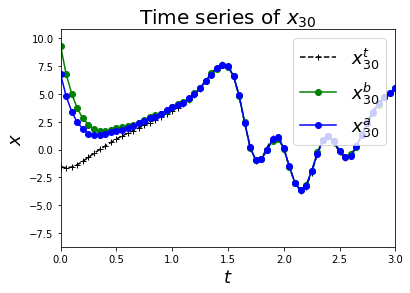

bias =  -0.2441576519904236
rmse =  0.44870256849738044


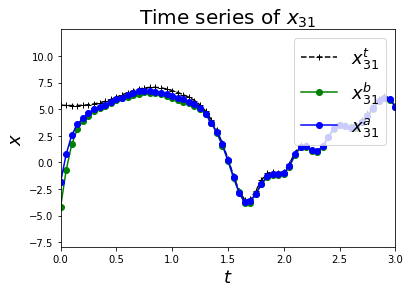

bias =  0.03453660468316534
rmse =  0.3305675086666231


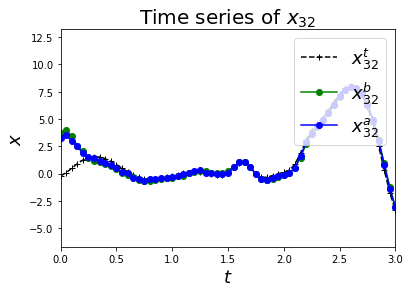

bias =  0.07629328979059455
rmse =  0.18250533760904838


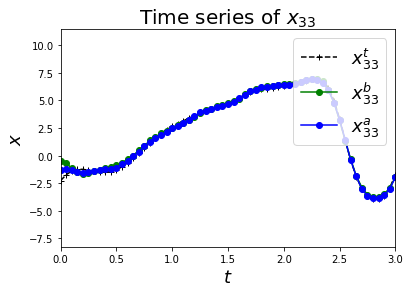

bias =  -0.11157917810543214
rmse =  0.3467421875770485


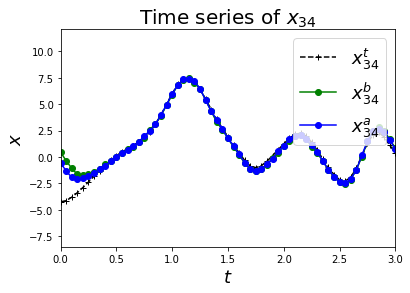

bias =  -0.3244827966415288
rmse =  0.37586543856981314


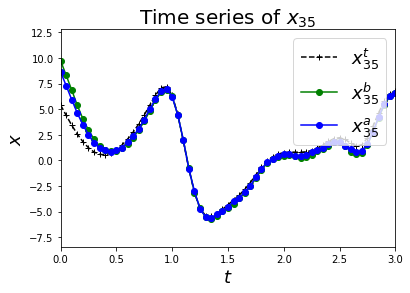

bias =  0.057680958717765664
rmse =  0.37990348925810885


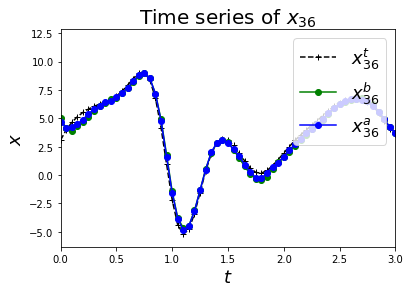

bias =  0.24671196762842362
rmse =  0.3069470122953477


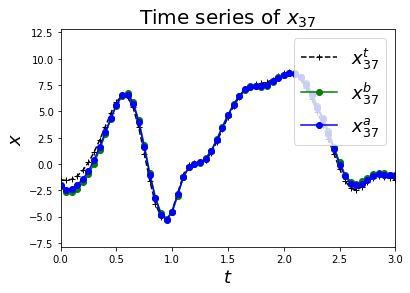

bias =  -0.10166960735074504
rmse =  0.25820633154900424


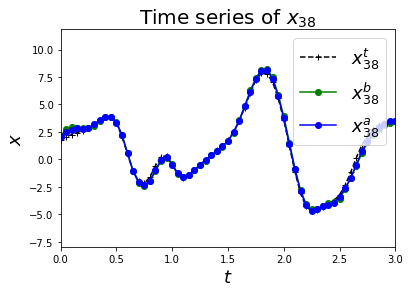

bias =  -0.07212244052621787
rmse =  0.3458745697277498


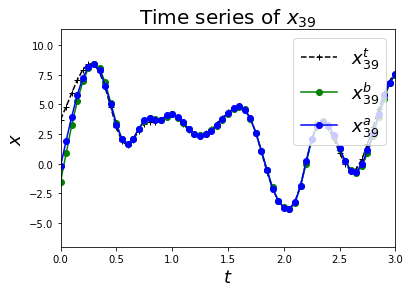

In [42]:
"""
Plot the data assimilation results
Read:
  x_t.txt
  x_b.txt
  x_a.txt
"""
import numpy as np
from settings import *
import matplotlib.pyplot as plt
N = 40

# load data
x_t_save = np.genfromtxt('x_t.txt')
x_b_save = np.genfromtxt('x_b.txt')
x_a_save = np.genfromtxt('x_a.txt')


# Plot time series of a single grid point
bias_v = []
rmse_v = []

for i in range(N):
    pt = i
    plt.figure()
    #print(x_a_save[:,pt-1])
    #print(x_b_save[:,pt-1])
    
    plt.plot(np.arange(nT+1) * dT, x_t_save[:,pt-1], 'k+--', label=r'$x^t_{' + str(pt) + '}$')
    plt.plot(np.arange(nT+1) * dT, x_b_save[:,pt-1], 'go-' , label=r'$x^b_{' + str(pt) + '}$')
    plt.plot(np.arange(nT+1) * dT, x_a_save[:,pt-1], 'bo-' , label=r'$x^a_{' + str(pt) + '}$')
    bias_i = (x_b_save[:,pt-1]-x_t_save[:,pt-1]).mean()
    print("bias = ", bias_i)
    rmse_i = np.std(x_b_save[:,pt-1]-x_t_save[:,pt-1])
    print("rmse = ", rmse_i)
    bias_v.append(bias_i)
    rmse_v.append(rmse_i)
    
    
    plt.xlabel(r'$t$', size=18)
    plt.ylabel(r'$x$', size=18)
    plt.xlim(0,3)
    plt.title(r'Time series of $x_{' + str(pt) + '}$', size=20)
    plt.legend(loc='upper right', numpoints=1, prop={'size':18})
    #plt.savefig('timeseries.png', dpi=200)
    plt.show()
    plt.close()

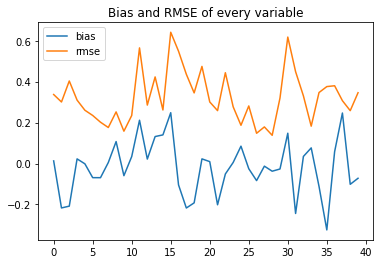

In [43]:
#per variable
#print(bias)
#print(rmse)
plt.plot(np.arange(N),bias_v, label="bias")
plt.plot(np.arange(N),rmse_v, label="rmse")
plt.legend(loc="upper left")
plt.title("Bias and RMSE of every variable")
plt.show()

In [44]:
analysis_error = x_b_save-x_t_save
bias_t = []
rmse_t = []
for i in range(nT):
    
    bias_i = analysis_error[i][:].mean()
    rmse_i = np.std(analysis_error[i][:])
    bias_t = np.append(bias_t, bias_i)
    rmse_t = np.append(rmse_t, rmse_i)

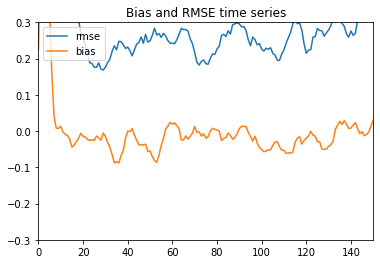

In [47]:
plt.plot(rmse_t, label ="rmse" )
plt.plot(bias_t, label = "bias")
plt.ylim(-0.3,0.3)
plt.xlim(0,150)
plt.legend(loc="upper left")
plt.title("Bias and RMSE time series")
plt.show()

In [46]:
rmse = rmse_t[30:800].mean()
bias = bias_t[30:800].mean()
print(rmse)

0.2529193358756977
